# scikit-learn中的逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.uniform(-4, 4, (100, 2))
y = np.array(X[:, 1] ** 2 - 4 * X[:, 0] < 4, dtype=int)

noisy_indexes = np.random.permutation(100)[:6]
y[noisy_indexes] = 1 - y[noisy_indexes]
axis = [-4.2, 4.2, -4.2, 4.2]

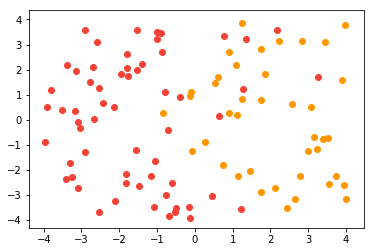

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
print(log_reg.score(X, y))

0.88


In [5]:
def plot_decision_boundary(algo, axis):
    
    x0 = np.linspace(axis[0], axis[1], int(100 * (axis[1]-axis[0])))
    x1 = np.linspace(axis[2], axis[3], int(100 * (axis[3]-axis[2])))
    x0, x1 = np.meshgrid(x0, x1)
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = algo.predict(X_new)
    z = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#f9a19a", "#cd93d7", "#9fa8da", "#90caf9", "#a5d7a7", "#fff59d", "#ffcb7f"])
    
    plt.contourf(x0, x1, z, linewidth=5, cmap=custom_map)

/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


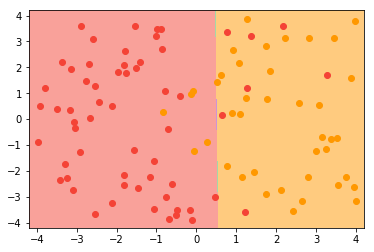

In [6]:
plot_decision_boundary(log_reg, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

0.93


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


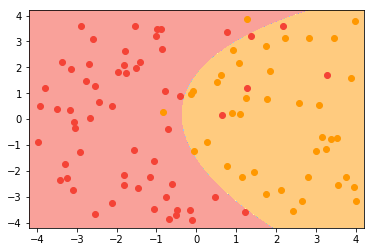

In [8]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)
print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

0.95


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


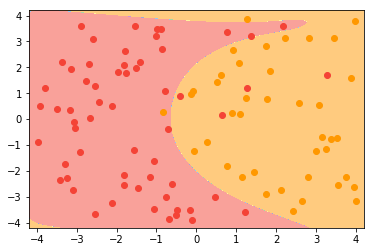

In [9]:
poly_log_reg = PolynomialLogisticRegression(degree=20)
poly_log_reg.fit(X, y)
print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [10]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C))
    ])

0.94


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


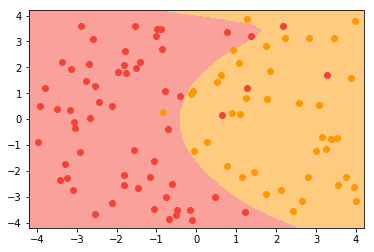

In [11]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg.fit(X, y)
print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [12]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C, penalty=penalty))
    ])

0.9


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


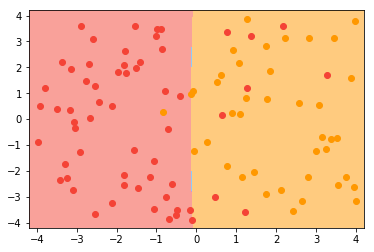

In [13]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg.fit(X, y)
print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()